In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
with open('2021VAERSDATA.csv', encoding="utf8", errors='ignore') as csv_file:
    vaccinationData = pd.read_csv(csv_file)
symptomData     = pd.read_csv('2021VAERSSYMPTOMS.csv')
vaccineTypeData = pd.read_csv('2021VAERSVAX.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
vaccinationData.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [17]:
vaccinationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30933 non-null  float64
 4   CAGE_YR       26791 non-null  float64
 5   CAGE_MO       83 non-null     float64
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34119 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

In [19]:
symptomData.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [20]:
symptomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48110 entries, 0 to 48109
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         48110 non-null  int64  
 1   SYMPTOM1         48110 non-null  object 
 2   SYMPTOMVERSION1  48110 non-null  float64
 3   SYMPTOM2         39351 non-null  object 
 4   SYMPTOMVERSION2  39351 non-null  float64
 5   SYMPTOM3         31542 non-null  object 
 6   SYMPTOMVERSION3  31542 non-null  float64
 7   SYMPTOM4         24444 non-null  object 
 8   SYMPTOMVERSION4  24444 non-null  float64
 9   SYMPTOM5         18560 non-null  object 
 10  SYMPTOMVERSION5  18560 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 4.0+ MB


In [21]:
vaccineTypeData.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [22]:
vaccineTypeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34630 entries, 0 to 34629
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         34630 non-null  int64 
 1   VAX_TYPE         34630 non-null  object
 2   VAX_MANU         34630 non-null  object
 3   VAX_LOT          23513 non-null  object
 4   VAX_DOSE_SERIES  34568 non-null  object
 5   VAX_ROUTE        26229 non-null  object
 6   VAX_SITE         26687 non-null  object
 7   VAX_NAME         34630 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [39]:
data = pd.merge_ordered(vaccinationData,
                        symptomData,
                        how='inner',
                        on = 'VAERS_ID'
                        )

In [27]:
data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48110 entries, 0 to 48109
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         48110 non-null  int64  
 1   RECVDATE         48110 non-null  object 
 2   STATE            41341 non-null  object 
 3   AGE_YRS          44372 non-null  float64
 4   CAGE_YR          38257 non-null  float64
 5   CAGE_MO          106 non-null    float64
 6   SEX              48110 non-null  object 
 7   RPT_DATE         88 non-null     object 
 8   SYMPTOM_TEXT     48108 non-null  object 
 9   DIED             2918 non-null   object 
 10  DATEDIED         2737 non-null   object 
 11  L_THREAT         2667 non-null   object 
 12  ER_VISIT         15 non-null     object 
 13  HOSPITAL         8740 non-null   object 
 14  HOSPDAYS         6193 non-null   float64
 15  X_STAY           79 non-null     object 
 16  DISABLE          1663 non-null   object 
 17  RECOVD      

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data:
    data[column]=le.fit_transform(data[column])

In [30]:
data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,0,0,50,45,31,7,0,24,21684,1,...,876,0,825,0,2133,2,1961,2,1729,2
1,1,0,5,85,71,7,0,24,3573,1,...,190,0,752,0,2133,2,1961,2,1729,2
2,2,0,55,35,21,7,0,24,2507,1,...,656,0,749,0,1438,0,1906,0,1729,2
3,3,0,55,70,56,7,0,24,28292,1,...,850,0,893,0,1260,0,1961,2,1729,2
4,4,0,50,59,45,7,0,24,13070,1,...,1342,0,1230,0,1049,0,909,0,1729,2


In [31]:
features=data.drop(columns=['DIED'])
label=data['DIED']

In [32]:
features.dtypes

VAERS_ID           int64
RECVDATE           int64
STATE              int64
AGE_YRS            int64
CAGE_YR            int64
CAGE_MO            int64
SEX                int64
RPT_DATE           int64
SYMPTOM_TEXT       int64
DATEDIED           int64
L_THREAT           int64
ER_VISIT           int64
HOSPITAL           int64
HOSPDAYS           int64
X_STAY             int64
DISABLE            int64
RECOVD             int64
VAX_DATE           int64
ONSET_DATE         int64
NUMDAYS            int64
LAB_DATA           int64
V_ADMINBY          int64
V_FUNDBY           int64
OTHER_MEDS         int64
CUR_ILL            int64
HISTORY            int64
PRIOR_VAX          int64
SPLTTYPE           int64
FORM_VERS          int64
TODAYS_DATE        int64
BIRTH_DEFECT       int64
OFC_VISIT          int64
ER_ED_VISIT        int64
ALLERGIES          int64
SYMPTOM1           int64
SYMPTOMVERSION1    int64
SYMPTOM2           int64
SYMPTOMVERSION2    int64
SYMPTOM3           int64
SYMPTOMVERSION3    int64


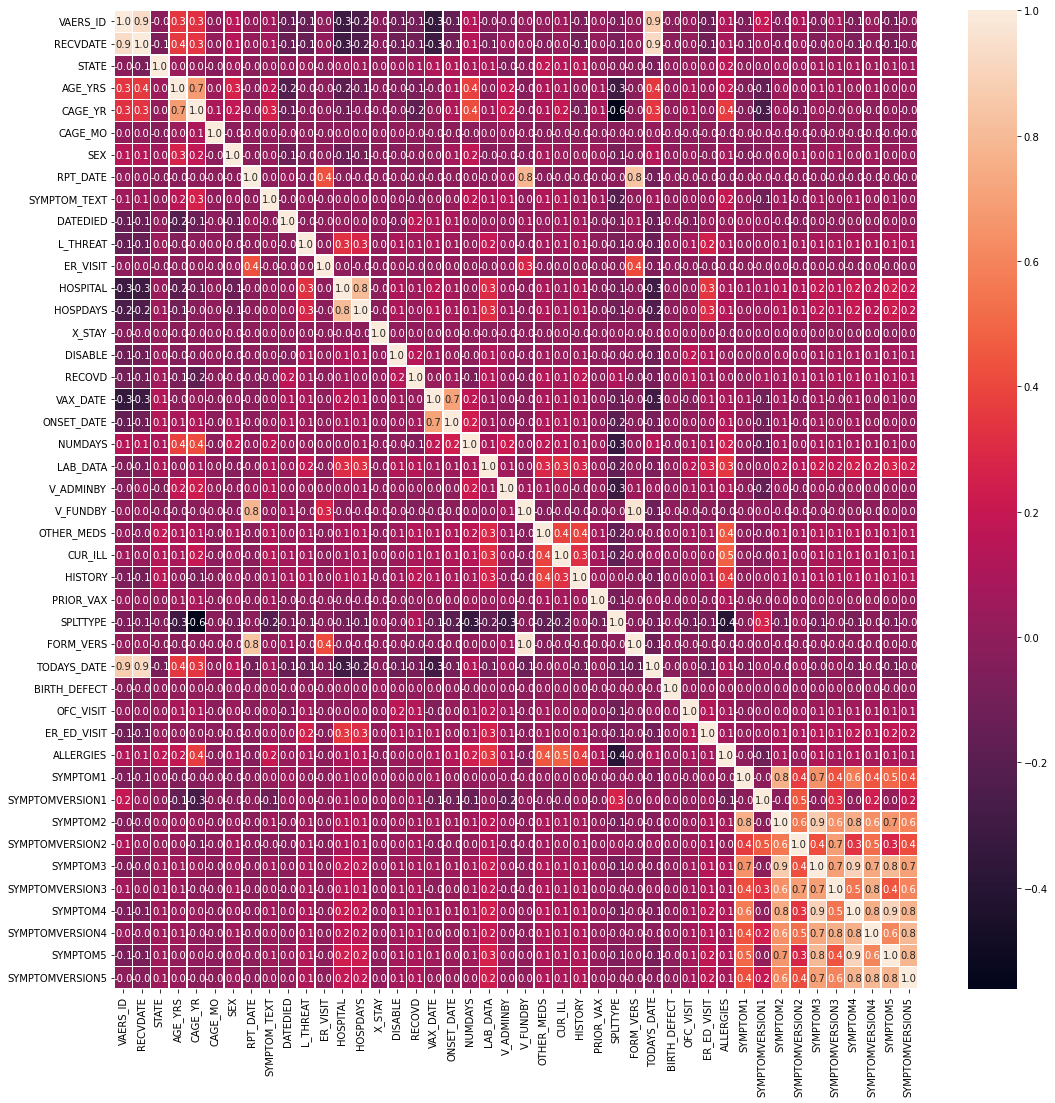

In [41]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(features.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [33]:
label

0        1
1        1
2        1
3        1
4        1
        ..
48105    1
48106    1
48107    0
48108    0
48109    0
Name: DIED, Length: 48110, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


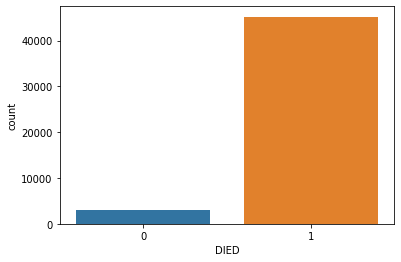

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(label)